In [74]:
import numpy as np

import matplotlib.pyplot as plt

In [75]:
def julia_mapping(z_n, c):
    z_n_plus_1 = z_n**2 + c

    return z_n_plus_1

def plot_the_evolution(num_steps, c=0, re_0=0.5, im_0=0.5):
    z = np.zeros(num_steps, dtype=complex)
    z[0] = re_0 + im_0 * 1j

    for step in range(1, num_steps):
        z[step] = julia_mapping(z[step-1], c)

    z_Re = z.real
    z_Im = z.imag

    plt.figure(figsize=(10, 3))
    plt.plot(range(num_steps), z_Re, label='Re(z)')
    plt.plot(range(num_steps), z_Im, label='Im(z)')

    plt.title('The evolution of z (c={}, initial z={}+{}i)'.format(c, re_0, im_0))
    plt.legend()
    plt.xlabel('step')
    plt.ylabel('value')
    plt.show()

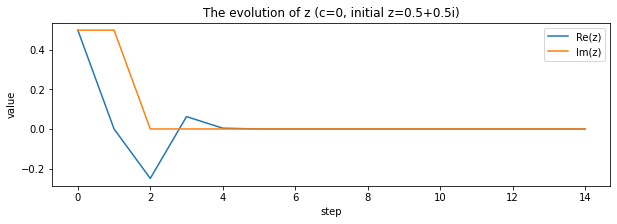

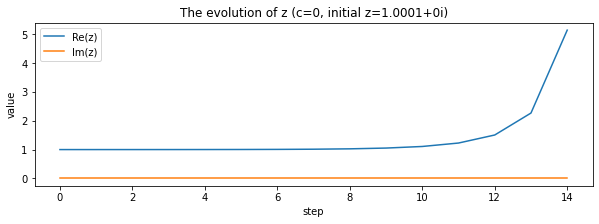

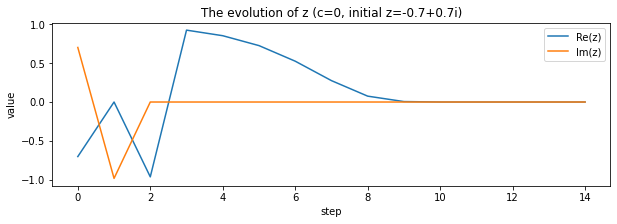

In [76]:
num_steps = 15

plot_the_evolution(num_steps, c=0, re_0=0.5, im_0=0.5)
plot_the_evolution(num_steps, c=0, re_0=1.0001, im_0=0)
plot_the_evolution(num_steps, c=0, re_0=-0.7, im_0=0.7)

In [77]:
def get_julia_set(Re_values, Im_values, c=0, num_steps=100, limit=100):
    z_matrix = np.zeros((len(Im_values), len(Re_values)), dtype=complex)
    for i in range(len(Im_values)):
        for j in range(len(Re_values)):
            z_matrix[i][j] = Re_values[j] + Im_values[i] * 1j

    map = np.zeros(z_matrix.shape)

    for step in range(num_steps):
        z_matrix[np.abs(z_matrix) < limit] = julia_mapping(z_matrix[np.abs(z_matrix) < limit], c)
        map[np.abs(z_matrix) > limit] += 1
        
    return map

def plot_julia(map, extent, title='Julia set'):
    plt.figure(figsize=(14, 11)) 

    scaler = 255 / np.max(map)
    map = map * scaler
    plt.imshow(map, cmap='cubehelix', extent=extent)

    plt.title(title, fontsize=20)
    plt.xlabel('Re(Z)', fontsize=20)
    plt.ylabel('Im(Z)', fontsize=20)
    plt.tick_params(labelsize=20)

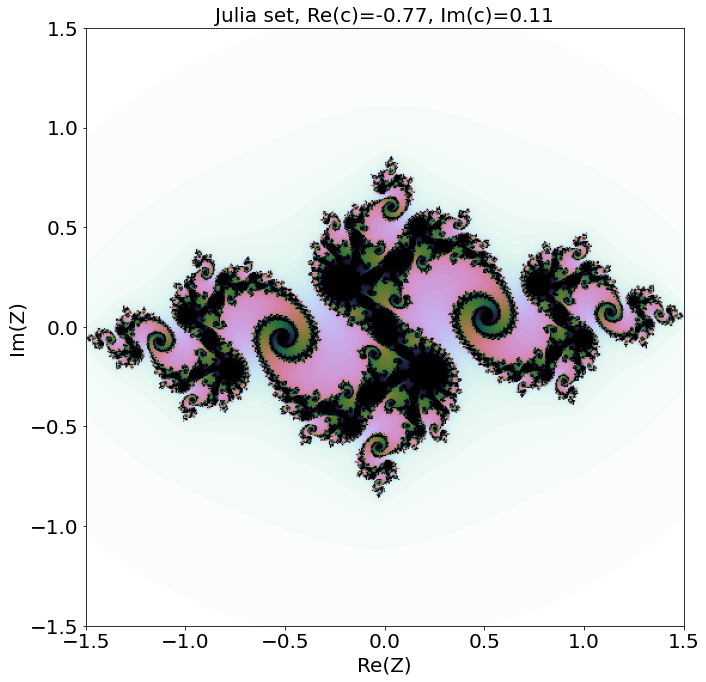

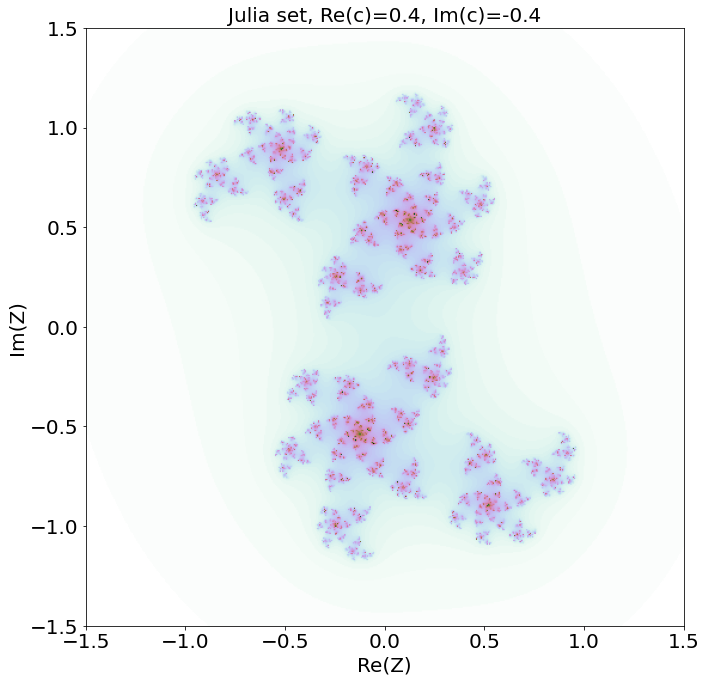

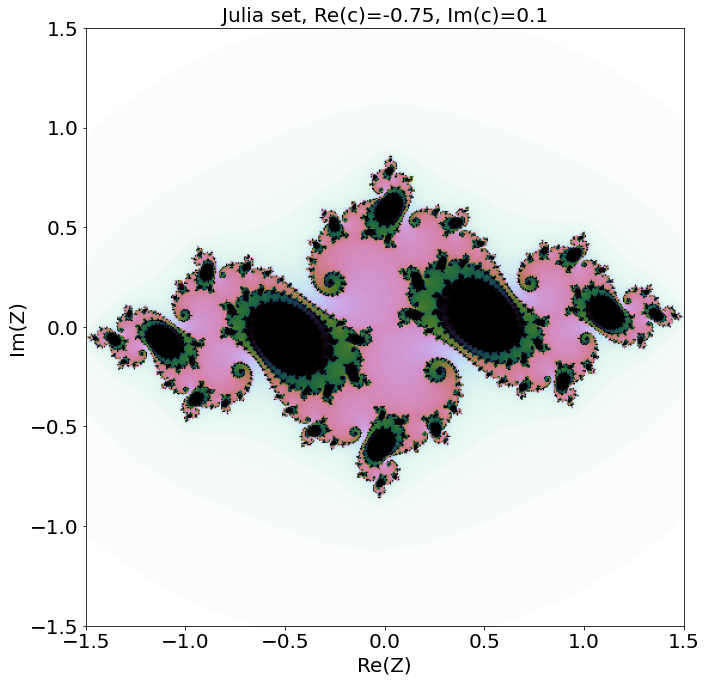

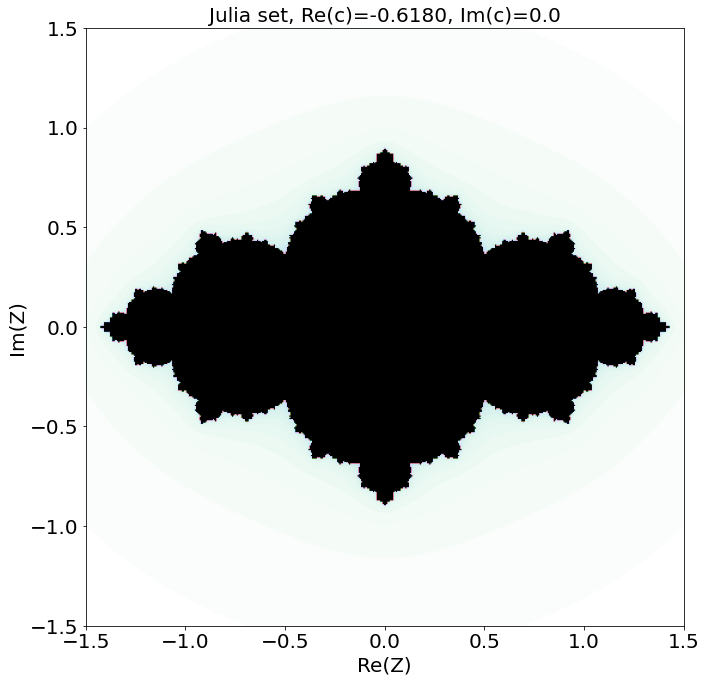

In [78]:
min_val = -1.5
max_val = 1.5
num_of_vals = 500
Re_values = np.linspace(min_val, max_val, num_of_vals)
Im_values = np.linspace(min_val, max_val, num_of_vals)

c = -0.77+0.11j
map = get_julia_set(Re_values, Im_values, c=c)
plot_julia(map, (min_val, max_val, min_val, max_val), 
           title='Julia set, Re(c)={}, Im(c)={}'.format(c.real, c.imag))

c=0.4-0.4j
map = get_julia_set(Re_values, Im_values, c=c)
plot_julia(map, (min_val, max_val, min_val, max_val), 
           title='Julia set, Re(c)={}, Im(c)={}'.format(c.real, c.imag))

c=-0.75+0.1j
map = get_julia_set(Re_values, Im_values, c=c)
plot_julia(map, (min_val, max_val, min_val, max_val), 
           title='Julia set, Re(c)={}, Im(c)={}'.format(c.real, c.imag))

golden_ratio = (1 + np.sqrt(5)) / 2
c=1-golden_ratio
map = get_julia_set(Re_values, Im_values, c=c)
plot_julia(map, (min_val, max_val, min_val, max_val), 
           title='Julia set, Re(c)={:.4f}, Im(c)={}'.format(c.real, c.imag))

In [79]:
import os
import imageio


def save_gif(Re_values, Im_values, num_frames, num_seconds):
    a = np.linspace(0, 2*np.pi, num_frames)
    c = [np.exp(a_i * 1j) for a_i in a]

    frames = []
    for i, c_i in enumerate(c):
        print('\r{}/{}'.format(i+1, len(c)), end='')
        
        frame = get_julia_set(Re_values, Im_values, c=c_i)
           
        plot_julia(frame, (min(Re_values), max(Re_values), min(Im_values), max(Im_values)),
                    title='Julia set, c=exp(i * a), a={:.4f}'.format(a[i]))
        plt.savefig('iframe.png')
        plt.close()

        frames.append(imageio.imread('iframe.png'))
     
    imageio.mimsave('julia.gif', frames, fps=num_frames/num_seconds)
    os.remove('iframe.png')   

In [92]:
from IPython.display import HTML


Re_values = np.linspace(-2, 2, 500)
Im_values = np.linspace(-2, 2, 500)

# save_gif(Re_values, Im_values, num_frames=400, num_seconds=20)
HTML('<img src="julia.gif">')